ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [5]:
!pip install -q wget

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



In [52]:
# Download the files
!wget -o classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -o predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [70]:
classes = np.genfromtxt('classes.txt.1',dtype='str')
#classes = pd.read_csv('classes.txt')

classes[:5]
#classes.head()

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [6]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data.shape

(50, 85)

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

Result: a (50, 2) matrix


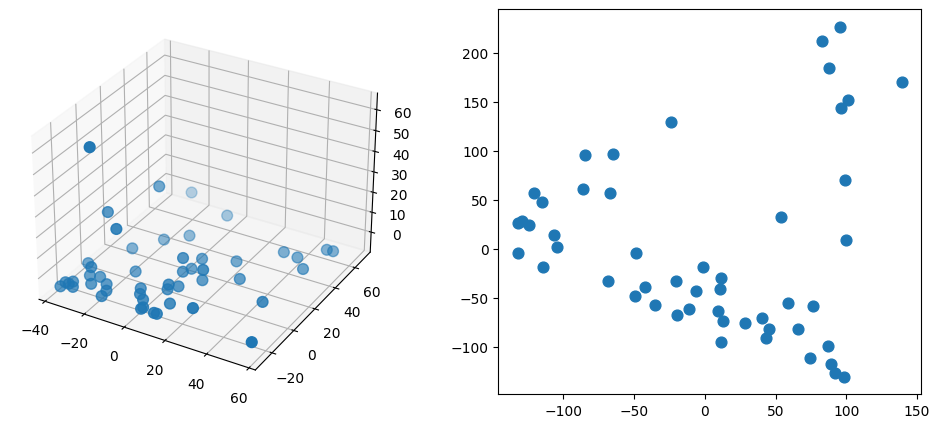

In [57]:
# TODO: enter code here

# 1. Center ข้อมูล
my_matrix = data

my_matrix = my_matrix - np.mean(my_matrix, axis = 0)  # normalize the columns

# 2. หา covariance matrix
A = np.cov(my_matrix, rowvar=False) # covariance matrix of M
#print(my_matrix, '<- M\n\n')
#print(A, '<- A')

# 3. Decompose the covariance matrix UDU^T
decomposeA = np.linalg.eigh(A)
#decomposeA

# 4. ดึง column ของ U ที่ประกอบไปด้วย eigenvector สองตัวที่มีค่า eigenvalue สูงที่สุด
D = decomposeA[0]
U = decomposeA[1]

l_2 = D[-1] #eigenvalue ที่มีค่าสูงที่สุด
l_3 = D[-2] #eigenvalue ที่มีค่ารองลงมา

U_23 = U[:,-2:]
#print(U_23, ' <- U_2')

# 5. เอา data_c ไปทำ projection ทิศทางของ eigenvector ใน U
my_matrix2 = my_matrix @ U_23  # M คือ matrix ที่มีข้อมูลอยู่
#print(M2)
# Plot initialization
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(my_matrix[:,0], my_matrix[:,1], my_matrix[:,2], s=60);

ax2 = fig.add_subplot(122)
ax2.scatter(my_matrix2[:,0], my_matrix2[:,1], s=60);
print("Result: a", my_matrix2.shape, "matrix")
# Result: a (50,2) matrix


#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [58]:
#TODO (optional): enter code here
# using PCA from Scikit-learn
pca = PCA(n_components=2) # ลดข้อมูลให้เป็น 2 มิติ
B2 = pca.fit_transform(data)
print(B2)

[[  14.33200256 -106.35992505]
 [ -58.9630861    76.22681969]
 [ 170.08767172  139.3662367 ]
 [  31.85582565   54.04638157]
 [ -29.65753503   11.3917049 ]
 [ -40.87859041   10.72272289]
 [   1.17791115 -104.79228138]
 [ -82.43016284   45.38757524]
 [ 211.92608739   82.83737143]
 [ -90.92835147   43.3052917 ]
 [ -58.01597662  -35.20297112]
 [ -33.18440666  -20.17533047]
 [-127.19955243   92.38136512]
 [ 129.48931695  -24.05695316]
 [-117.35250987   89.2965802 ]
 [  28.55636713 -129.17123958]
 [ -43.49964663   -6.27693742]
 [ 226.54893728   95.28906181]
 [  95.64111855  -85.05034027]
 [ -18.3316707    -1.34492612]
 [  56.58550468 -120.70785352]
 [-111.97091878   74.12827031]
 [  25.79398483 -132.31759287]
 [ 151.36316459  100.93057781]
 [ -67.92677834  -19.55128584]
 [ -48.25033667  -49.77147826]
 [ -61.48822496  -11.07402232]
 [  96.32422934  -65.00899433]
 [ -32.71055049  -68.2626778 ]
 [ -55.32175189   58.45553839]
 [  24.47458869 -124.27963392]
 [ -99.3303442    86.88931727]
 [ -73.5

In [59]:
# Compare to my_matrix2
my_matrix2

array([[-106.35992505,   14.33200256],
       [  76.22681969,  -58.9630861 ],
       [ 139.3662367 ,  170.08767172],
       [  54.04638157,   31.85582565],
       [  11.3917049 ,  -29.65753503],
       [  10.72272289,  -40.87859041],
       [-104.79228138,    1.17791115],
       [  45.38757524,  -82.43016284],
       [  82.83737143,  211.92608739],
       [  43.3052917 ,  -90.92835147],
       [ -35.20297112,  -58.01597662],
       [ -20.17533047,  -33.18440666],
       [  92.38136512, -127.19955243],
       [ -24.05695316,  129.48931695],
       [  89.2965802 , -117.35250987],
       [-129.17123958,   28.55636713],
       [  -6.27693742,  -43.49964663],
       [  95.28906181,  226.54893728],
       [ -85.05034027,   95.64111855],
       [  -1.34492612,  -18.3316707 ],
       [-120.70785352,   56.58550468],
       [  74.12827031, -111.97091878],
       [-132.31759287,   25.79398483],
       [ 100.93057781,  151.36316459],
       [ -19.55128584,  -67.92677834],
       [ -49.77147826,  -

#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

In [65]:
print(B2.shape)

(50, 2)


In [66]:
classes = classes.astype(str)

In [67]:
print(classes)

                                                                                                           --2023-12-07 05:21:00--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages....  172.66.47.56                 2606:4700:310c::ac42:2f38                                                ...                          
Connecting to donlapark.pages.dev (donlapark.pa... NaN                          NaN                                                                       nan                          
HTTP request sent                                   awaiting response... 200 OK NaN                                                                       nan                          
Length: 755 [text/plain]                           NaN                          NaN                                                                       nan                          
Saving to: ‘classes.txt.1’                         NaN                          

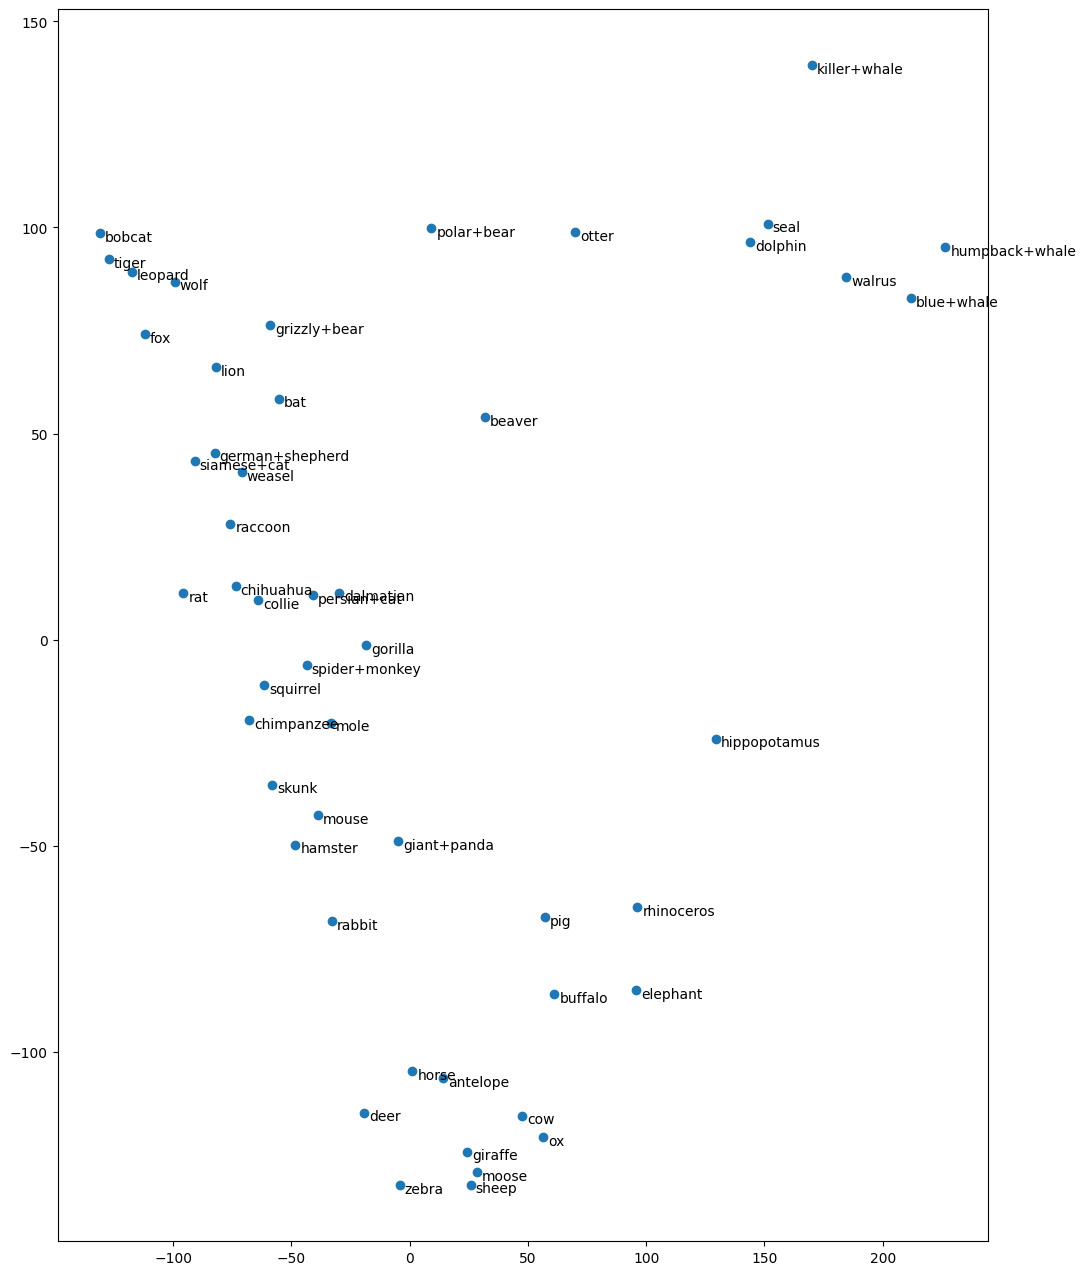

In [74]:
# กำหนดขนาดของรูป
plt.figure(figsize=(12,16))

# จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้
# รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)

#plt.scatter(TODO: 1st column of your 50x2 matrix, #TODO: 2nd column of your 50x2 matrix)
plt.scatter(B2[:,0], B2[:,1])

# for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
# ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ
#TODO: YOUR_MATRIX[i,0]
#TODO YOUR_MATRIX[i,1]
for i in range(50):
  plt.annotate(
          classes[i,1],
          xy=(B2[i,0],
              B2[i,1]),
              xytext=(5, -8),
              textcoords='offset pixels')


plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

1. กลุ่มสัตว์ที่มุมขวาบน ตัวอย่างเช่น seal, dolphin, walrus, blue+whale มีลักษณะที่เหมือนกันคือ เป็นสัตว์ทะเลที่มีหางทรงแนวขวางสามารถว่ายน้ำได้อย่างรวดเร็ว
2. กลุ่มสัตว์ที่อยู่ตรงกลางด้านล่าง ตัวอย่างเช่น giraffe, moose, sheep, zebra  มีลักษณะที่เหมือนกันคือ เป็นสัตว์กินพืชที่อาศัยอยู่บนบก
3. กลุ่มสัตว์ที่มุมซ้ายบน ตัวอย่างเช่น bobcat, tiger, leopard, wolf มีลักษณะที่เหมือนกันคือ เป็นสัตว์กินเนื้อที่อาศัยอยู่บนบก
4. กลุ่มสัตว์ที่กลางซ้าย ตัวอย่างเช่น chihuahua, collie, persian+cat, dalmatian มีลักษณะที่เหมือนกันคือ เป็นสัตว์เลี้ยง